In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, auc, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

In [2]:
test = pd.read_csv("churn-bigml-20.csv")  
train = pd.read_csv("churn-bigml-80.csv") 

# <font color="purple"> Data Pre-processing

In [3]:
df = pd.concat([test, train], ignore_index=True)

In [4]:
df.shape

(3333, 20)

In [5]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [7]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [9]:
duplicates = df[df.duplicated()]
if not duplicates.empty:
    print("\nDuplicate rows in the merged dataset:")
    print(duplicates)
else:
    print("\nNo duplicate rows found in the merged dataset.")


No duplicate rows found in the merged dataset.


In [10]:
churners = df[df['Churn'] == 1]
non_churners = df[df['Churn'] == 0]

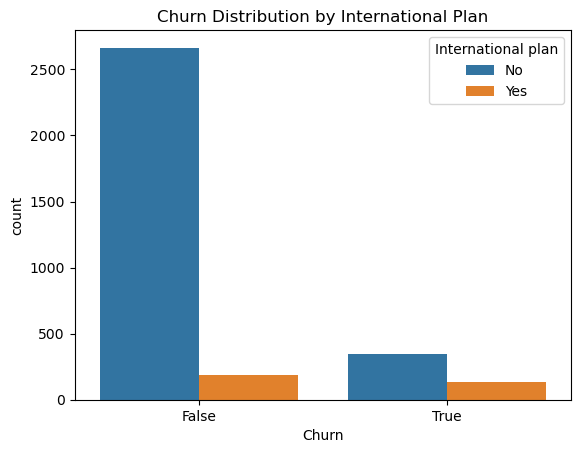

In [11]:
sns.countplot(data=df, x='Churn', hue='International plan')
plt.title('Churn Distribution by International Plan')
plt.show()

<div style="font-size:large; font-weight:bold">
    <font color="magenta">Label Encoding</font>
</div>

In [12]:
colonne_categorielle = 'State' 

valeurs_uniques = df[colonne_categorielle].value_counts()

pd.set_option('display.max_rows', len(valeurs_uniques))  
print(valeurs_uniques)

WV    106
MN     84
NY     83
AL     80
OR     78
OH     78
WI     78
VA     77
WY     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
KS     70
MD     70
MT     68
NJ     68
NC     68
NV     66
WA     66
CO     66
MA     65
MS     65
RI     65
AZ     64
FL     63
MO     63
NM     62
ND     62
ME     62
OK     61
NE     61
DE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64


In [13]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['State'] = label_encoder.fit_transform(df['State'])
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,18,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,15,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,34,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,40,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,11,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [14]:
colonne_categorielle = 'International plan' 

valeurs_uniques = df[colonne_categorielle].value_counts()

pd.set_option('display.max_rows', len(valeurs_uniques))  
print(valeurs_uniques)

No     3010
Yes     323
Name: International plan, dtype: int64


In [15]:
df['International plan']=df['International plan'].apply(lambda x: 1 if x == 'Yes' else 0)

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,18,117,408,0,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,11,49,510,0,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [16]:
colonne_categorielle = 'Voice mail plan' 

valeurs_uniques = df[colonne_categorielle].value_counts()

pd.set_option('display.max_rows', len(valeurs_uniques))  
print(valeurs_uniques)

No     2411
Yes     922
Name: Voice mail plan, dtype: int64


In [17]:
df['Voice mail plan']=df['Voice mail plan'].apply(lambda x: 1 if x == 'Yes' else 0)

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,18,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,11,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [18]:
colonne_categorielle = 'Churn' 

valeurs_uniques = df[colonne_categorielle].value_counts()

pd.set_option('display.max_rows', len(valeurs_uniques))  
print(valeurs_uniques)

False    2850
True      483
Name: Churn, dtype: int64


In [19]:
df['Churn'] = df['Churn'].map({True: 1, False: 0})

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,18,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,11,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


In [20]:
colonne_categorielle = 'Churn' 

valeurs_uniques = df[colonne_categorielle].value_counts()

pd.set_option('display.max_rows', len(valeurs_uniques))  
print(valeurs_uniques)

0    2850
1     483
Name: Churn, dtype: int64


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   int32  
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   int64  
 4   Voice mail plan         3333 non-null   int64  
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

# <font color="purple"> Feature Selection

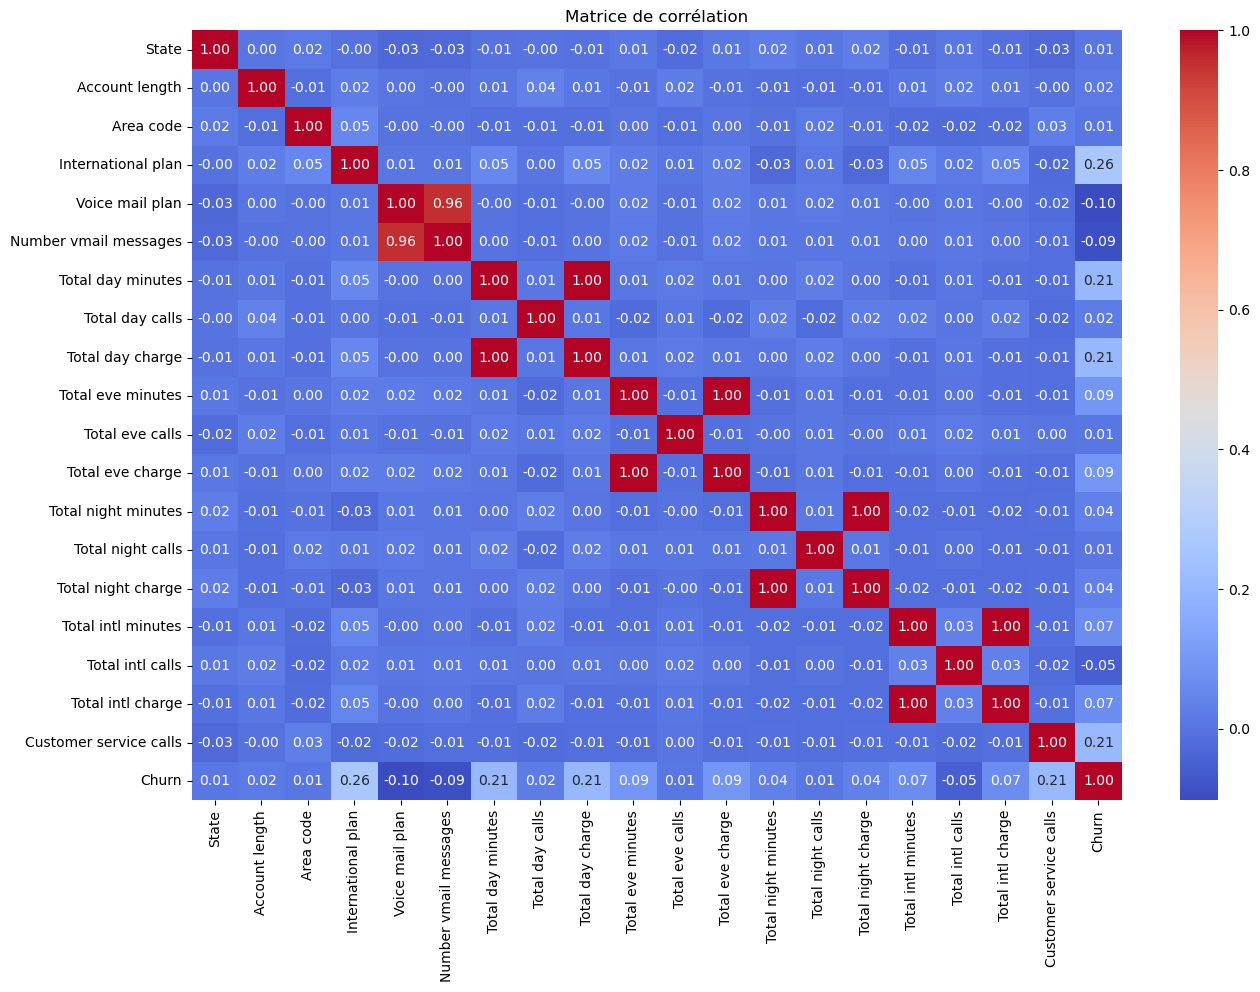

In [22]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

In [23]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_columns.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

print(f"Colonnes à supprimer (corrélation > 0.95): {to_drop}")

Colonnes à supprimer (corrélation > 0.95): ['Number vmail messages', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']


In [24]:
# df.drop(columns=['Number vmail messages', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge'], inplace=True)

In [25]:
df.shape

(3333, 20)

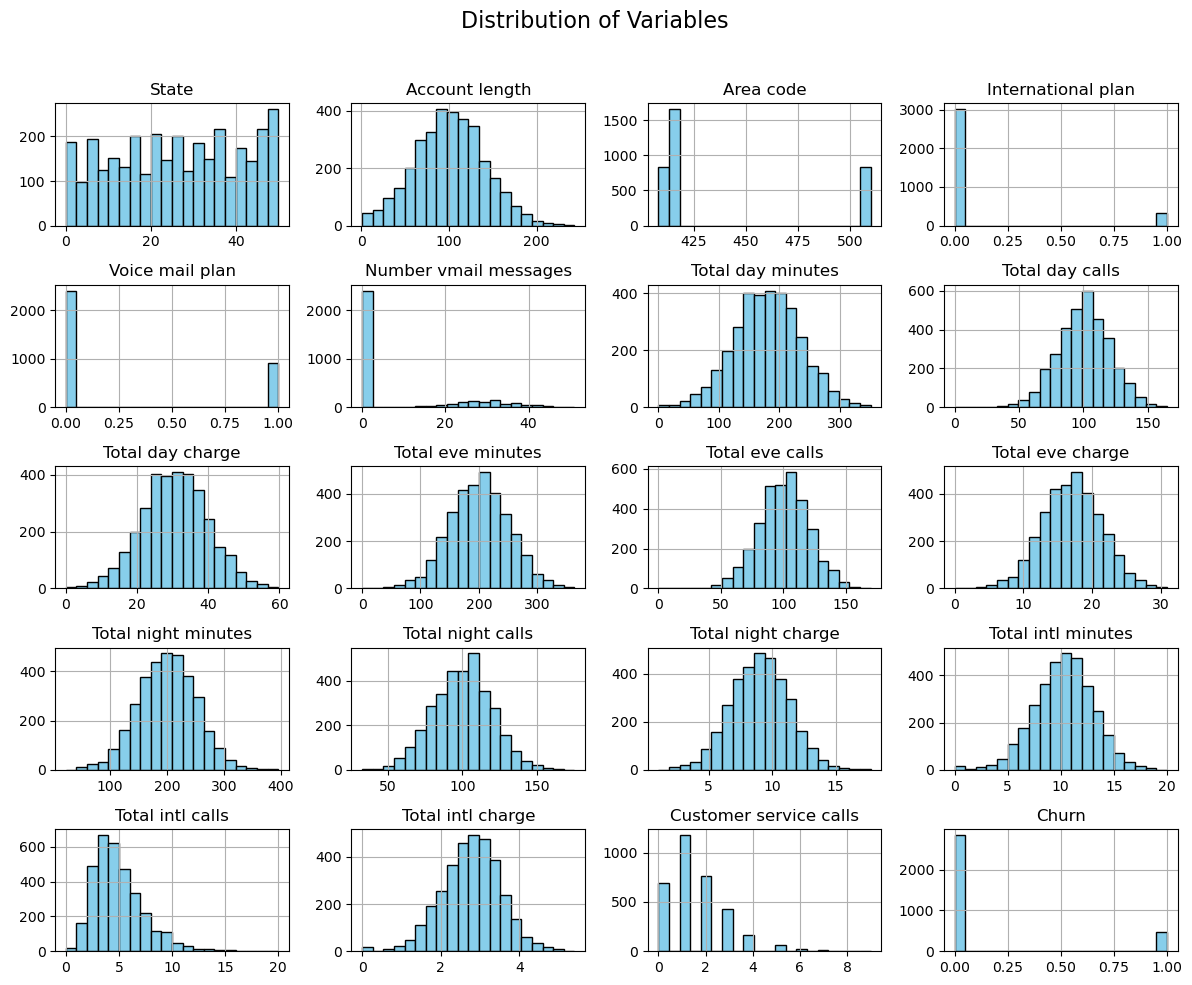

In [26]:
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')

plt.suptitle('Distribution of Variables', fontsize=16)

# Ajuster les espaces entre les sous-graphiques
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

# <font color="purple"> Outliers detection

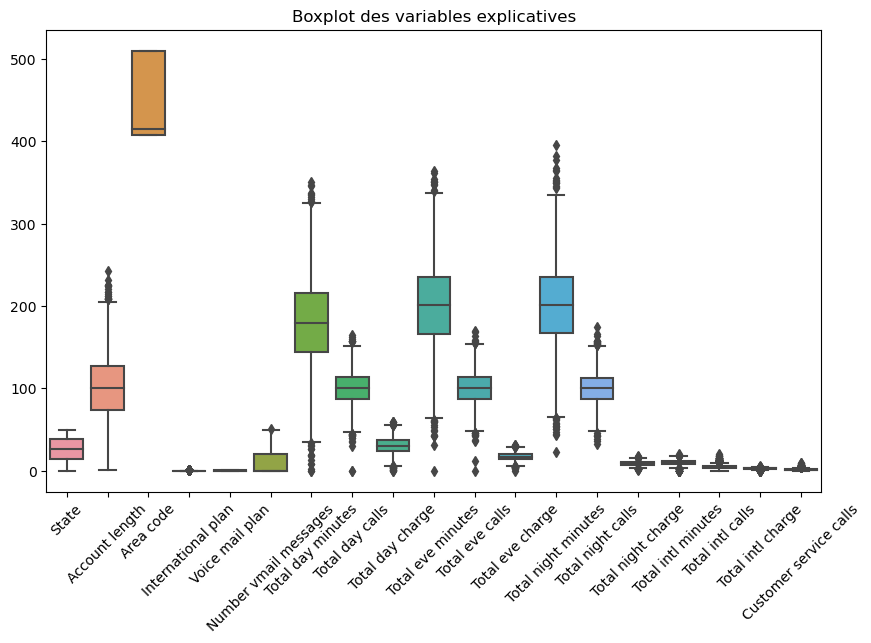

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['Churn']))
plt.title('Boxplot des variables explicatives')
plt.xticks(rotation=45)
plt.show()

In [28]:
# 3. Identification des colonnes
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
binary_cols = ['International plan', 'Voice mail plan', 'Churn']  # Colonnes binaires identifiées
non_binary_numerical_cols = [col for col in numerical_cols if col not in binary_cols]

# --- Fonction de traitement des outliers avec IQR ---
def get_iqr_bounds(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

def handle_outliers_with_iqr(df, column, lower_bound, upper_bound):
    # Remplacer les outliers par les bornes
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Appliquer le traitement des outliers uniquement sur les colonnes numériques non binaires
for col in non_binary_numerical_cols:
    # Calcul des bornes pour le train dataset
    lower_bound, upper_bound = get_iqr_bounds(df, col)
    df = handle_outliers_with_iqr(df, col, lower_bound, upper_bound)

In [29]:
colonne_categorielle = 'Churn' 

valeurs_uniques = df[colonne_categorielle].value_counts()

pd.set_option('display.max_rows', len(valeurs_uniques))  
print(valeurs_uniques)

0    2850
1     483
Name: Churn, dtype: int64


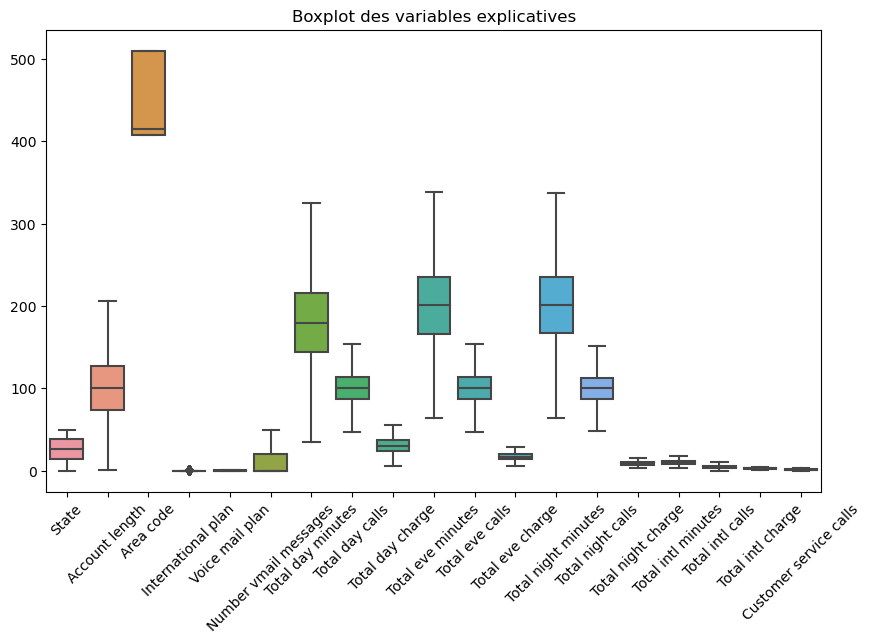

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['Churn']))
plt.title('Boxplot des variables explicatives')
plt.xticks(rotation=45)
plt.show()

# <font color="purple"> PCA


In [31]:
x = df.drop(columns=['Churn'])
y = df['Churn']

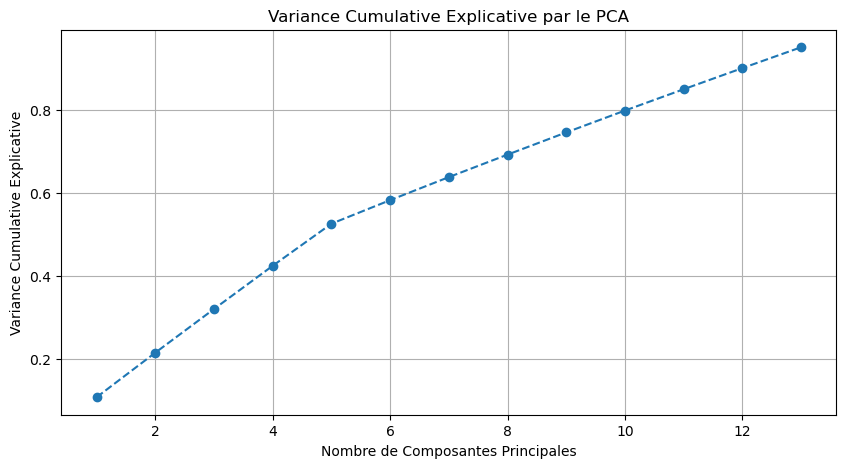

                             PC1       PC2       PC3       PC4       PC5  \
State                  -0.009435 -0.022977  0.008819 -0.013525 -0.055159   
...                          ...       ...       ...       ...       ...   
Customer service calls  0.015850 -0.015719 -0.006353 -0.042316  0.002042   

                             PC6       PC7       PC8       PC9      PC10  \
State                  -0.039223  0.303305 -0.501164 -0.258811  0.404780   
...                          ...       ...       ...       ...       ...   
Customer service calls  0.333868 -0.198310  0.566865  0.060301  0.459508   

                            PC11      PC12      PC13  
State                  -0.493307  0.278706 -0.169551  
...                          ...       ...       ...  
Customer service calls -0.260875 -0.201350  0.032695  

[19 rows x 13 columns]


In [32]:
features = x.select_dtypes(include=[np.number])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

pca = PCA(n_components=0.9)  
pca_data = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Variance Cumulative Explicative par le PCA')
plt.xlabel('Nombre de Composantes Principales')
plt.ylabel('Variance Cumulative Explicative')
plt.grid()
plt.show()

loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=features.columns)
print(loadings)

In [33]:
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10','PC11','PC12','PC13']
x_pca = pd.DataFrame(pca_data, columns=columns)

In [34]:
x_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
max,4.946369,4.820739,4.677836,5.016346,5.378992,3.562569,3.843299,3.567,3.605451,3.376616,3.979294,3.429469,3.306625


# <font color="purple"> Classification

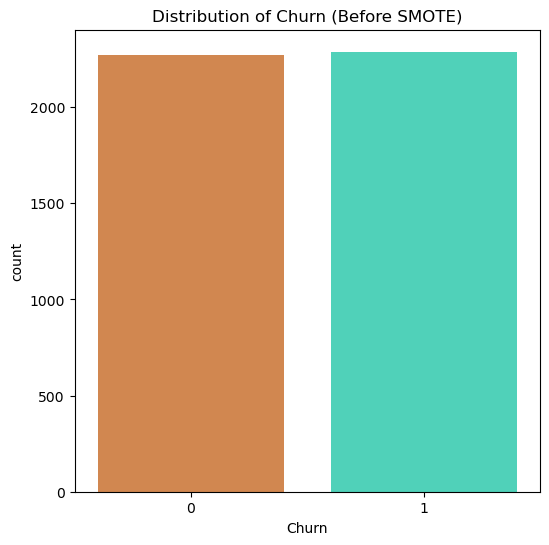

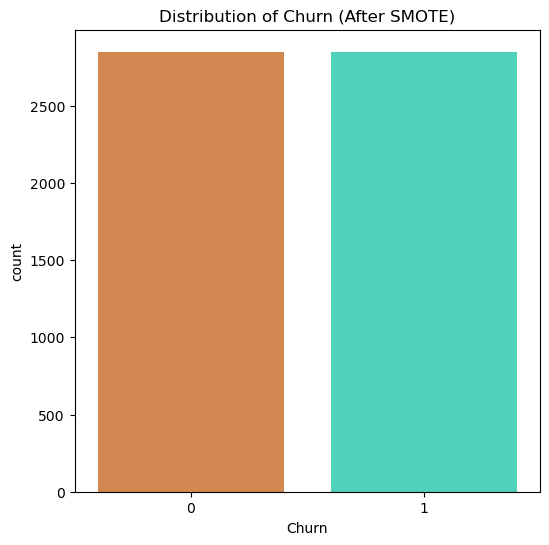

In [115]:
plt.figure(figsize=(6, 6))
sns.countplot(x=y_train, palette=['#e6843b', '#3be6c7'])
plt.title('Distribution of Churn (Before SMOTE)')
plt.show()

# Appliquer SMOTE pour équilibrer les classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_pca, y)

plt.figure(figsize=(6, 6))
sns.countplot(x=y_train_resampled, palette=['#e6843b', '#3be6c7'])
plt.title('Distribution of Churn (After SMOTE)')
plt.show()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled,  y_train_resampled, test_size=0.2, random_state=1)

<span style="color: magenta; font-size: 18px;">1) Random Forest Classifier</span>

In [81]:
rfc = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=10, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [82]:
y_predRFC = rfc.predict(X_test)

In [83]:
print("Accuracy for RandomForestClassifier: {:.3f}".format(accuracy_score(y_test, y_predRFC)))

Accuracy for RandomForestClassifier: 0.893


In [84]:
print("Classification Report:\n", classification_report(y_test, y_predRFC))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       578
           1       0.90      0.89      0.89       562

    accuracy                           0.89      1140
   macro avg       0.89      0.89      0.89      1140
weighted avg       0.89      0.89      0.89      1140



<span style="color: magenta; font-size: 18px;">2) Decision Tree Classifier</span>

In [77]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
y_predDCT = dtc.predict(X_test)

In [79]:
accuracy = accuracy_score(y_test, y_predDCT)
print("Exactitude du modèle Decision Tree:", accuracy)

Exactitude du modèle Decision Tree: 0.8315789473684211


In [89]:
print("Classification Report:\n", classification_report(y_test, y_predDCT))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       578
           1       0.81      0.87      0.84       562

    accuracy                           0.83      1140
   macro avg       0.83      0.83      0.83      1140
weighted avg       0.83      0.83      0.83      1140



<span style="color: magenta; font-size: 18px;">3) Logistic Regression</span>

In [120]:
log_reg = LogisticRegression(random_state=12)

# Entraînement du modèle
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=12)

In [121]:
y_pred_log_reg = log_reg.predict(X_test)

In [126]:
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy:", accuracy_log_reg)

Accuracy: 0.6754385964912281


In [127]:
print("Classification Report:\n", classification_report(y_test,  y_pred_log_reg))

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.66      0.67       578
           1       0.66      0.69      0.68       562

    accuracy                           0.68      1140
   macro avg       0.68      0.68      0.68      1140
weighted avg       0.68      0.68      0.68      1140



# <font color="purple"> Interpretation

<span style="color: #813be6; font-size: 18px;">1) Confusion Matrix</span>

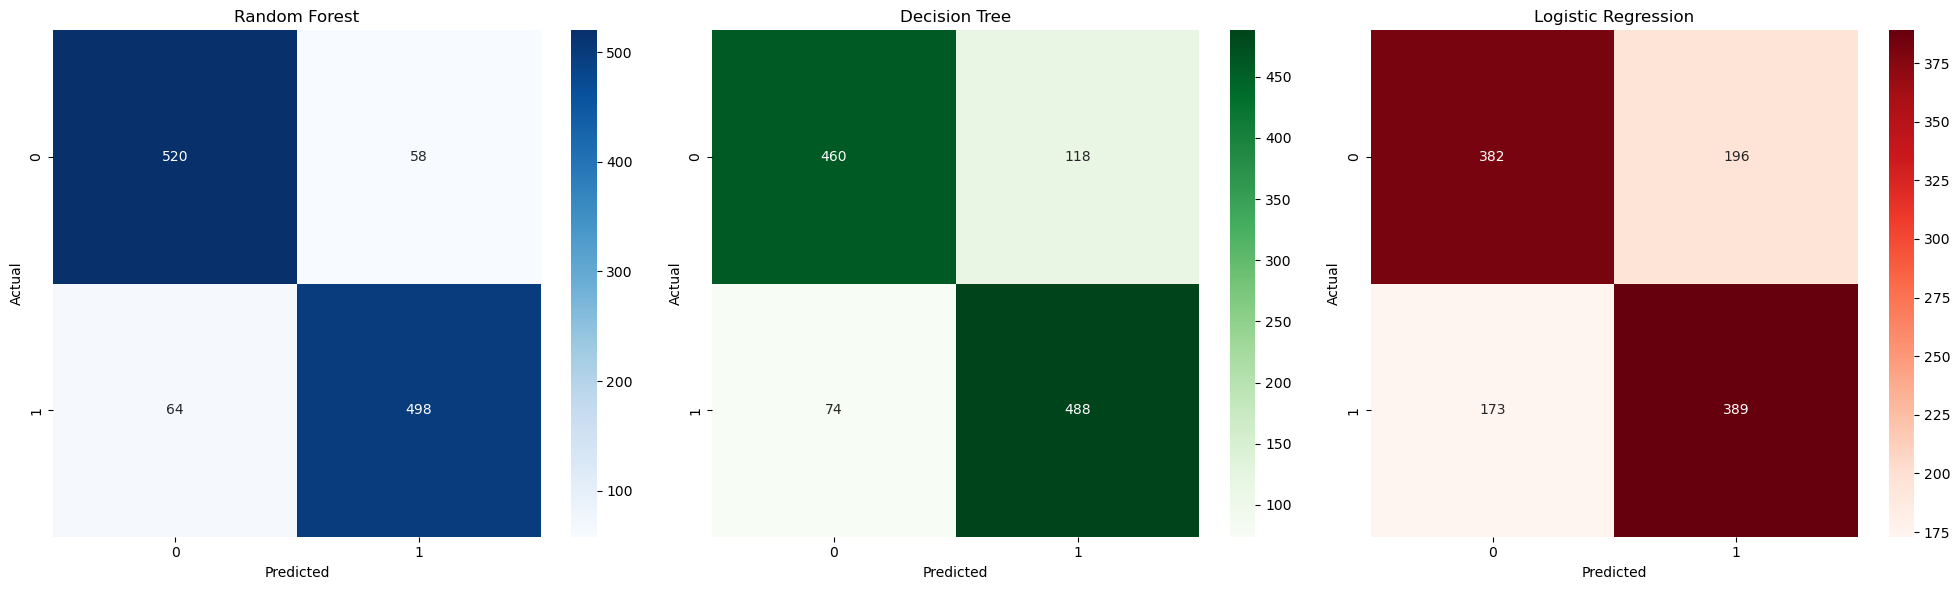

In [103]:
conf_matrix_dtc = confusion_matrix(y_test, y_predDCT)  # For Decision Tree
conf_matrix_rfc = confusion_matrix(y_test, y_predRFC)  # For Random Forest
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)  # For Logistic Regression

# Configurer la figure avec des sous-graphiques
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Random Forest
sns.heatmap(conf_matrix_rfc, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Random Forest')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Decision Tree
sns.heatmap(conf_matrix_dtc, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Decision Tree')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Logistic Regression
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Reds', ax=axes[2])
axes[2].set_title('Logistic Regression')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

# Ajuster les espacements
plt.tight_layout()
plt.show()

<span style="color: #813be6; font-size: 18px;">2) F1 Score</span>

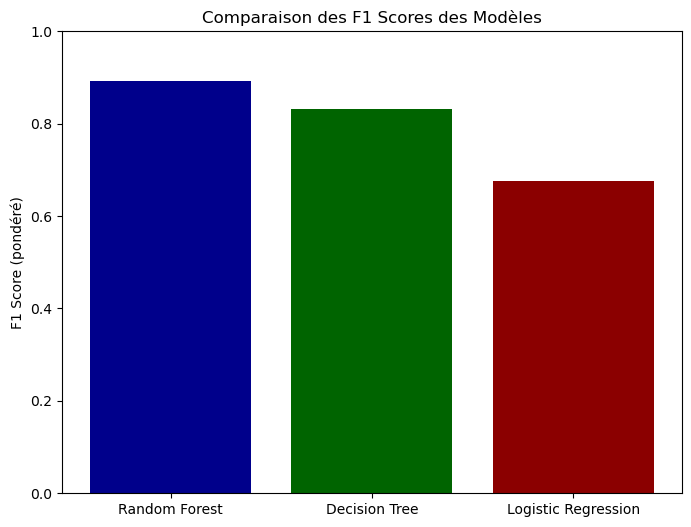

In [104]:
f1_rfc = f1_score(y_test, y_predRFC, average='weighted')  # Random Forest
f1_dtc = f1_score(y_test, y_predDCT, average='weighted')  # Decision Tree
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')  # Logistic Regression

# Préparer les données pour le graphique
model_names = ['Random Forest', 'Decision Tree', 'Logistic Regression']
f1_scores = [f1_rfc, f1_dtc, f1_log_reg]

# Créer le graphique en barres
plt.figure(figsize=(8, 6))
plt.bar(model_names, f1_scores, color=['darkblue', 'darkgreen', 'darkred'])
plt.ylabel("F1 Score (pondéré)")
plt.title("Comparaison des F1 Scores des Modèles")
plt.ylim(0, 1)  # Limiter l'échelle entre 0 et 1
plt.show()

<span style="color: #813be6; font-size: 18px;">3) ROC</span>

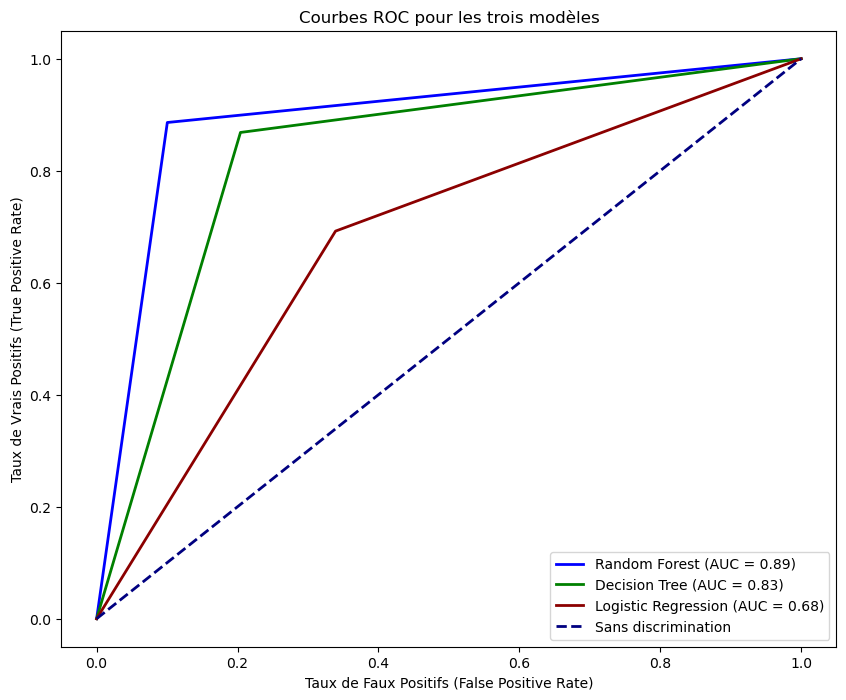

In [106]:
# Calcul des courbes ROC et des AUC
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_predRFC)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_predDCT)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)

fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest (AUC = %0.2f)' % roc_auc_rfc, color='blue', lw=2)
plt.plot(fpr_dtc, tpr_dtc, label='Decision Tree (AUC = %0.2f)' % roc_auc_dtc, color='green', lw=2)
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log_reg, color='darkred', lw=2)

# Ajouter la diagonale "sans discrimination"
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Sans discrimination')

# Configurer le graphique
plt.xlabel('Taux de Faux Positifs (False Positive Rate)')
plt.ylabel('Taux de Vrais Positifs (True Positive Rate)')
plt.title('Courbes ROC pour les trois modèles')
plt.legend(loc="lower right")
plt.show()